For the final project, I will be analyzing the data found in the Countries of the World dataset: https://www.kaggle.com/fernandol/countries-of-the-world.

This data was compiled by the US government and shows information as of 2017 for every country of the world on the population, area, population density, coastline area ratio, net migration, infant mortality, GDP, literacy percentage, number of phones, arable land percentage, crops on land percentage, land used for other percentage, climate, birthrate, and deathrate. It also shows job distributions for each country in the agriculture, industry, and service sectors.


In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

# read csv and convert commas to periods
df = pd.read_csv('countries-of-the-world.csv', decimal=",")
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


In [186]:

df.describe()


,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


The above shows the average, frequency, min, max, and other values for the data in this dataset.


In [187]:

# get df of just rows that have some missing column values
df_mis = df[df.isnull().any(axis=1)]
df_mis.shape


(48, 20)

In [188]:
df_mis

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.00,NaN,0.151,0.096,0.753
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
52,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,NaN,7.79,4.44,87.77,3.0,12.56,7.68,0.037,0.198,0.765
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,58.6,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620


As seen above, there are a total of 48 rows in the data that have some column or multiple columns with missing values. Some of these appear to be smaller or third-world countries that may not have as accurate or extensive statistical research data available. The agiriculture, industry, and service columns look to be common missing values among the entries.


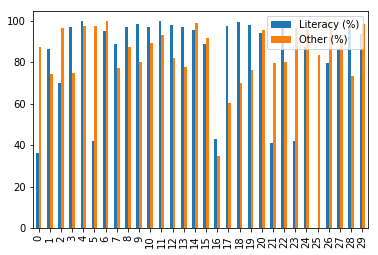

In [189]:

# show the literacy percentage and percentage of land not used for crops or arable land for first 30 countries as a barplot
plt.figure()
df.head(30)[['Literacy (%)', 'Other (%)']].plot(kind='bar')
plt.show()


The above shows that the literacy rate and amount of land not used for farming doesn't have much of a correlation. Some countries such as afghanistan don't have much land used for crops but have low literacy, while others like barbados have high literacy while also having a higher amount of land used for farmland. It appears to differ from country to country.

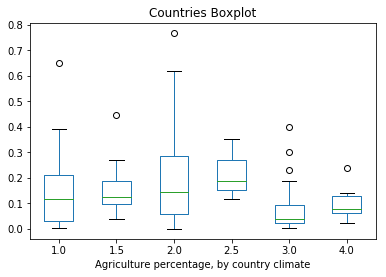

In [190]:

# show boxplot for percentage of agricultural industry by climate for countries 30-59 in the dataframe
df_lim = df.iloc[30:60,:]

plt.figure()
df.boxplot(column='Agriculture', by='Climate', grid=False)
plt.xlabel('Agriculture percentage, by country climate')
plt.suptitle("")
plt.title("Countries Boxplot")
plt.show()


Note: Climate values are based on a 4 point scale of:
1. Dry tropical or tundra and ice
2. Wet tropical
3. Temperate humid subtropical and temperate continental
4. Dry hot summers and wet winters

This shows that tropical countries are generally higher and range more in agricultural percentage in comparsion to more temperate countries. This may be due to many tropical countries being devoloping countries in comparison to temperate countries. Tropical countries may have more need for algriculture too in comparison to service and industry as well.


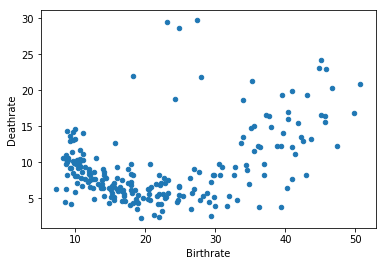

In [191]:
# create scatterplot showing birthrate to deathrate

plt.figure()
df.plot.scatter('Birthrate', 'Deathrate')
plt.xlabel('Birthrate')
plt.ylabel('Deathrate')
plt.show()


This shows that the deathrate stays pretty consistently low while the birthrate goes up, regardless of the country. There are some outliers however with some countries where the deathrate and birthrate is about the same. These are likely in third world countries where healthcare isn't as good in comparison to richer countries.

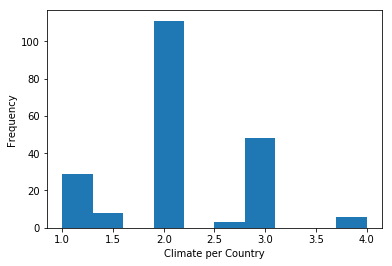

In [192]:
# show histogram of frequency of climate types for each country

plt.figure()
df['Climate'].plot.hist()
plt.xlabel('Climate per Country')
plt.show()


This shows that the most common climate among the list of countries is wet tropical, while the least common climate is somewhere between wet tropical and temperate tropical.



-----------------------------------------------------------

<u>Final Project</u>

Firstly, missing values for variables will be imputed using linear regression and neural networks. They will then be compared to both eachother to see how similar the imputed values are to eachother and to determine which may do a better job of imputing data based on the cooresponding country.

In [193]:
# get dataset without Country, and Region. Drop climate since it should be classified
df_lesscols = df.drop(['Country', 'Region', 'Climate'], axis=1)
# get complete dataset with no entries with missing data from the df without agriculture, industry, and service
df_lesscom = df_lesscols.dropna(axis=0, how='any')
df_lesscom


,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,0.380,0.240,0.380
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
5,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,45.11,24.20,0.096,0.658,0.246
6,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,14.17,5.34,0.040,0.180,0.780
7,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,16.93,5.37,0.038,0.220,0.743
8,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,16.73,7.55,0.095,0.358,0.547
9,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,12.07,8.23,0.239,0.343,0.418
10,71891,193,372.5,35.49,0.00,5.89,28000.0,97.0,516.1,10.53,0.00,89.47,11.03,6.68,0.004,0.333,0.663
11,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,12.14,7.51,0.038,0.262,0.700


In [194]:
# predictions are only done for variables that have missing values
# if a variable in the original dataset is found to have a missing value, a linear regression model is fitted 
#  using every other variable and used for predicting that variable
# iterates starting at population variable
# create dictionary to store the predicted values for each column to analyze and impute into dataset
preds_lin = {}
for column in df_lesscols.columns[0:]:
    for row in df_lesscols[column].isnull():
        if row:
            # fit a model using df with no missing values
            X = df_lesscom.drop([column], axis=1)
            y = df_lesscom[column]
            lm = linear_model.LinearRegression()
            lm.fit(X, y)
            # make predictions only on rows that have missing values
            X_all = df_lesscols.drop([column], axis=1)
            # temporarily change any rows with missing X values to mean of the column to allow for predicting missing y value
            X_all = X_all.fillna(X_all.mean())
            missing = df_lesscols[column].isnull()
            preds_missing = lm.predict(X_all.loc[missing, :])
            # add the predicted values for the column with missing values to the dictionary
            preds_lin[column] = preds_missing
            break



In [195]:
# some predictions made for net migration and phones using linear regression
print(preds_lin['Net migration'])
print(preds_lin['Phones (per 1000)'])

[-3.24725172 -4.33417951  2.20817901]
[428.42842982 105.53927609 162.81488986  54.52107261]


In [196]:
# do the same, but this time using a neural network
# dictionary to store predicted values for columns using neural network
preds_net = {}
for column in df_lesscols.columns[0:]:
    for row in df_lesscols[column].isnull():
        if row:
            # fit a model using df with no missing values
            X = df_lesscom.drop([column], axis=1)
            X = pd.DataFrame(preprocessing.scale(X), columns=X.columns)
            y = df_lesscom[column]
            # MLPRegressor using 3 hidden layers
            lm = MLPRegressor(hidden_layer_sizes=(100,100,50), solver='lbfgs', max_iter=500, random_state=1)
            lm.fit(X, y)
            # make predictions only on rows that have missing values
            X_all = df_lesscols.drop([column], axis=1)
            # temporarily change any rows with missing X values to mean of the column to allow for predicting missing y value
            X_all = X_all.fillna(X_all.mean())
            X_all = pd.DataFrame(preprocessing.scale(X_all), columns=X_all.columns)
            missing = df_lesscols[column].isnull()
            preds_missing = lm.predict(X_all.loc[missing, :])
            # add the predicted values for the column with missing values to the dictionary
            preds_net[column] = preds_missing
            break
            
            

In [197]:
# some predictions made for net migration and phones using neural networks
print(preds_net['Net migration'])
print(preds_net['Phones (per 1000)'])

[-1.11957156 -4.4309654  -2.28704348]
[521.77804309  28.93062437 281.35193434 228.7975919 ]


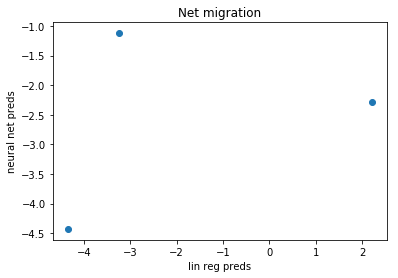

8.247805228812581


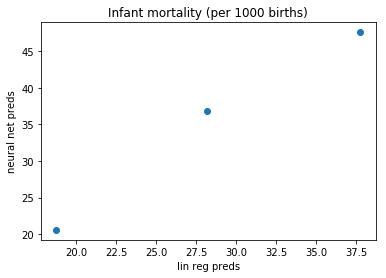

57.87036102474317


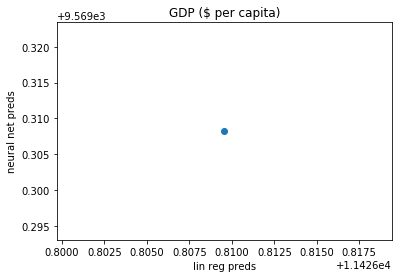

3450311.1512038875


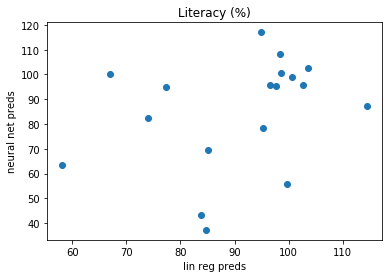

514.5420871996535


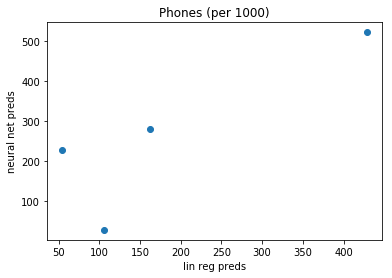

14751.592976429778


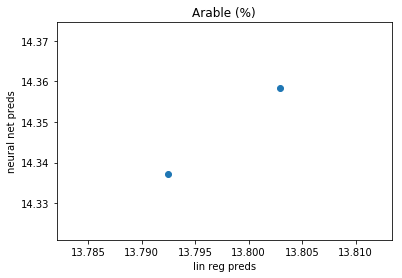

0.30259326926055036


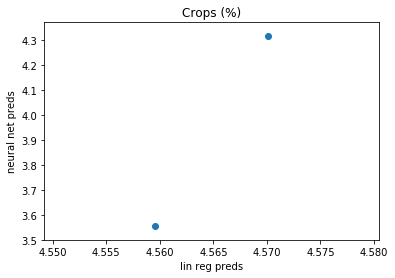

0.5382707657681517


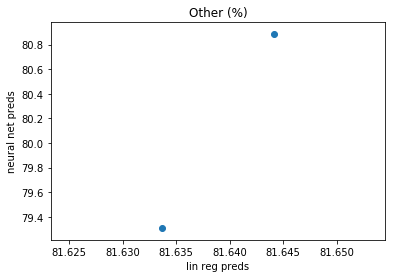

2.9917380113008583


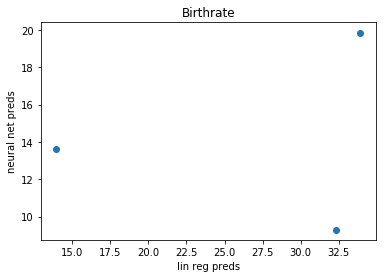

242.40932984430913


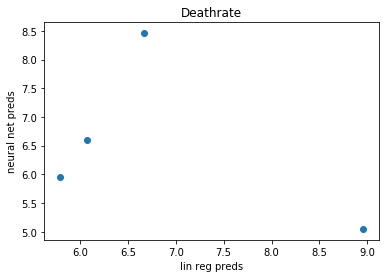

4.701245025838459


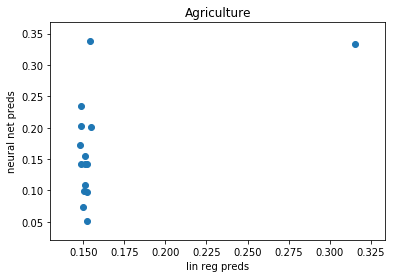

0.004730257983560638


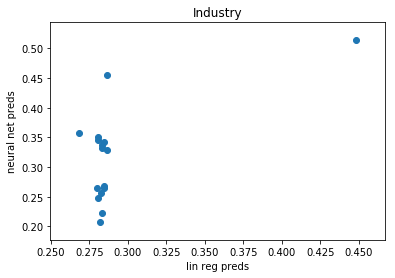

0.004520218323446075


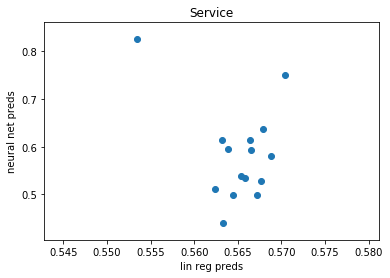

0.009886263043786791


In [198]:
# compare the predicted values for missing data between linear regression and neural networks
for column in preds_lin:
    plt.figure()
    plt.scatter(preds_lin[column], preds_net[column])
    plt.xlabel('lin reg preds')
    plt.ylabel('neural net preds')
    plt.title(column)
    plt.show()
    print(mean_squared_error(preds_lin[column], preds_net[column]))
    

As seen above, the predicted values for imputation found using linear regression and neural networks are a pretty similar to each other, with an exception of a couple variables. The variables with the closest values regardless of the machine learning method used appear to be those found for arable, crops, and other. This may be due to the fact that there aren't many values needed to be imputed for these variables and the values are pretty similar for most other countries, resulting in both methods getting values which are close. The variables for agriculture, industry, and service are also pretty close since they are percentage values and most modern countries are similar in the way that they mostly consist of service jobs. Literacy also seems to be predicting values around 100% regardless of method as well. This is likely due to the fact that most countries have 100 or near 100 literacy rates. Values predicted for literacy that are over 100 will have to be reduced to 100 for imputation. Values such as GDP have very large MSE, likely because there is only one country with a missing value and the numbers vary by a large amount.

In [199]:
# scale predicted literacy rates down to 100 for both predicted value sets
arr = preds_lin['Literacy (%)']
for i in range(len(arr)):
    if arr[i] > 100:
        arr[i] = 100
        
preds_lin['Literacy (%)'] = arr

arr = preds_net['Literacy (%)']
for i in range(len(arr)):
    if arr[i] > 100:
        arr[i] = 100

preds_net['Literacy (%)'] = arr

    

Now, both sets of predictions will be imputed to seperate dataframes of the original entries and compared to eachother. Whichever dataframe with imputed values that seems more realistic based on the countries being imputed into will be taken.

In [200]:
df_lin_imp = df.drop(['Climate'], axis=1)
df_net_imp = df.drop(['Climate'], axis=1)

# rows with missing values regardless of the column
missing_all = df.isnull()

# impute the predicted values into each row with missing data for both dataframes
for column in preds_lin:
    missing = df[column].isnull()
    df_lin_imp.loc[missing,column]=preds_lin[column]
    df_net_imp.loc[missing,column]=preds_net[column]


In [201]:
# create a 1 dimensional array from the dataframe showing positions where values were missing
missing_arr = []
for i in range(missing_all.shape[0]):
    for j in range(missing_all.shape[1]):
        # if a column in the row is found to have a true, append true and go to next row
        if missing_all.iloc[i, j]:
            missing_arr.append(True)
            break
        # if gotten to last column and no trues, append false
        if j == missing_all.shape[1] - 1:
            missing_arr.append(False)

# look at dataframes for the rows with the newly imputed values
df_lin_imp_miss = df_lin_imp.loc[missing_arr, :]
df_net_imp_miss = df_net_imp.loc[missing_arr, :]


In [202]:
df_lin_imp_miss

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.000000,15.000000,75.00000,22.460000,3.270000,0.150606,0.282647,0.565385
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.220000,0.000000,97.78000,8.710000,6.250000,0.150960,0.283462,0.566360
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.000000,191.190000,1900.000000,42.000000,7.800000,2.410000,0.240000,97.35000,45.110000,24.200000,0.096000,0.658000,0.246000
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.310000,21.050000,6100.000000,98.616864,215.400000,13.600000,2.960000,83.44000,8.770000,8.270000,0.142000,0.308000,0.550000
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.960000,4.750000,29800.000000,97.000000,552.200000,4.960000,0.020000,95.02000,10.780000,7.800000,0.022000,0.294000,0.684000
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,-3.247252,28.193076,5000.000000,95.000000,289.900000,17.390000,13.040000,69.57000,21.000000,8.954851,0.151000,0.096000,0.753000
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.580000,6.840000,10600.000000,98.500000,420.400000,26.090000,2.270000,71.65000,9.610000,11.480000,0.070000,0.308000,0.622000
52,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.430000,7.180000,19200.000000,97.600000,428.428430,7.790000,4.440000,87.77000,12.560000,7.680000,0.037000,0.198000,0.765000
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.000000,47.410000,500.000000,58.600000,105.539276,4.710000,0.670000,94.62000,26.990000,6.240000,0.085000,0.231000,0.684000
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.410000,6.240000,22000.000000,95.185087,503.800000,2.140000,0.000000,97.86000,14.050000,8.700000,0.270000,0.110000,0.620000


In [203]:
df_mis

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.00,NaN,0.151,0.096,0.753
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
52,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,NaN,7.79,4.44,87.77,3.0,12.56,7.68,0.037,0.198,0.765
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,58.6,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620


As seen above, the data imputed using linear regression appears to make sense. Data imputed for 3rd world countries for literacy such as Mayotte(58%) and West Bank(77%) are lower in comparison to that which is imputed for comparitively richer countries such as Bosnia & Herzegovina(98%). Also, values imputed for variables such as net migration and infant mortality appear to make sense for the specific country even though they were found using linear regression. For example, Cook Islands is a poorer country and they were imputed to have negative net migration and relatively higher infant mortality. 

One of the countries with the most missing values, Western Sahara, may have predictions quite off of what is actually true however. According to wikipedia, the country's GDP per capita was 2500 as of 2007, so the chances of it being 11427 are pretty low. It's also unlikely that the literacy rate is exactly 100% too, given that it's a poor country and similar countries don't have perfect literacy. These values being off is likely due to the fact that there weren't many features to use for predicting.

The values imputed for agriculture, industry, and service labour distributions look to fairly accurate as well. Service is weighted more heavily for the majority of countries, while poorer countries have relatively higher weighting on agriculture and industry.

In [204]:
df_net_imp_miss

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.000000,15.000000,75.000000,22.460000,3.270000,0.099035,0.256111,0.538538
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.220000,0.000000,97.780000,8.710000,6.250000,0.108308,0.337364,0.613611
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.000000,191.190000,1900.000000,42.000000,7.800000,2.410000,0.240000,97.350000,45.110000,24.200000,0.096000,0.658000,0.246000
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.310000,21.050000,6100.000000,100.000000,215.400000,13.600000,2.960000,83.440000,8.770000,8.270000,0.142000,0.308000,0.550000
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.960000,4.750000,29800.000000,97.000000,552.200000,4.960000,0.020000,95.020000,10.780000,7.800000,0.022000,0.294000,0.684000
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,-1.119572,36.810362,5000.000000,95.000000,289.900000,17.390000,13.040000,69.570000,21.000000,5.044239,0.151000,0.096000,0.753000
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.580000,6.840000,10600.000000,98.500000,420.400000,26.090000,2.270000,71.650000,9.610000,11.480000,0.070000,0.308000,0.622000
52,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.430000,7.180000,19200.000000,97.600000,521.778043,7.790000,4.440000,87.770000,12.560000,7.680000,0.037000,0.198000,0.765000
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.000000,47.410000,500.000000,58.600000,28.930624,4.710000,0.670000,94.620000,26.990000,6.240000,0.085000,0.231000,0.684000
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.410000,6.240000,22000.000000,78.252987,503.800000,2.140000,0.000000,97.860000,14.050000,8.700000,0.270000,0.110000,0.620000


In [205]:
df_mis

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.00,NaN,0.151,0.096,0.753
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
52,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,NaN,7.79,4.44,87.77,3.0,12.56,7.68,0.037,0.198,0.765
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,58.6,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620


Like with linear regression, the values imputed using neural networks also appear to make sense given the context of the country. Literacy rates seem to be a little higher than those from linear regression, but still seem to be fairly accurate. Some values such as Tuvalu's literacy are vastly different from what was found using linear regression. Linear regression found Tuvalu to have a literacy of 84% while neural networks found it to have only 37%. In this case, linear regression is more accurate since wikipedia states the country to be at 99% as of 2002.

The values for Western Sahara's GDP and literacy appear to be a little closer to reality for neural networks, although the value for phones per 1000 (228) seems to be less accurate with neural networks.

Values for agriculutre, industry, and service are similar to linear regression, with service being weighted more heavily for richer countries.

Taking the previous into consideration, the imputed values using linear regression will be used over those found with neural networks. This is because there appears to be slightly more imputations with wildly varying values with neural networks in comparison to linear regression. Also due to the sample size being small, neural network imputation may not be as accurate as it would have been with a larger sample size.

In [206]:
# update the original dataframe with the imputed values
# only updates original dataframe values that are NA
df.update(df_lin_imp, overwrite=False)
# round values to those of original df
df = df.round({'Net migration': 2, 'Infant mortality (per 1000 births)': 2, 'GDP ($ per capita)': 1, 'Literacy (%)': 1, 'Phones (per 1000)': 1, 'Arable (%)': 2, 'Crops (%)': 2, 'Other (%)': 2, 'Birthrate': 2, 'Deathrate': 2, 'Agriculture': 3, 'Industry': 3, 'Service': 3})
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.151,0.283,0.565
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.151,0.283,0.566
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


Now, using every other variable, missing values for climate will be imputed using KNN.

In [207]:
df_com = df.dropna(axis=0, how='any')
# country and region varibles dropped
df_com = df_com.drop(['Country', 'Region'], axis=1)

X = df_com.drop(['Climate'], axis=1)
X = pd.DataFrame(preprocessing.scale(X), columns=X.columns)

# convert climate values to strings so they can be classified
y = df_com['Climate'].astype(str)


In [208]:
# KNN classifier using k value of 5
lm = KNeighborsClassifier(5)
lm.fit(X, y)

X_all = df.drop(['Country', 'Region', 'Climate'], axis=1)
missing = df['Climate'].isnull()

preds_missing = lm.predict(X_all.loc[missing, :])
print(preds_missing)


['2.0' '2.0' '2.0' '3.0' '3.0' '2.0' '2.0' '2.0' '2.0' '2.0' '2.0' '2.0'
 '2.0' '2.0' '2.0' '2.0' '2.0' '3.0' '3.0' '2.0' '2.0' '2.0']


In [209]:
# convert the predictions back to floats
preds_missing = preds_missing.astype(float)

# insert the values into the original dataframe and analyze them for cooresponding countries
df.loc[missing,'Climate']=preds_missing
# get dataframe for just rows with inserted climate value
df_knn_mis = df.loc[missing, :]


In [210]:
# show dataframe for countries with imputed climates
df_knn_mis

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,2.0,45.11,24.20,0.096,0.658,0.246
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,2.0,10.78,7.80,0.022,0.294,0.684
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,2.0,9.61,11.48,0.070,0.308,0.622
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,95.2,503.8,2.14,0.00,97.86,3.0,14.05,8.70,0.270,0.110,0.620
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,99.7,877.7,0.00,0.00,100.00,3.0,10.74,9.31,0.154,0.287,0.570
101,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,430.9,27.79,9.53,62.68,2.0,8.72,10.40,0.021,0.291,0.688
115,Lebanon,NEAR EAST,3874050,10400,372.5,2.16,0.00,24.52,4800.0,87.4,255.6,16.62,13.98,69.40,2.0,18.52,6.21,0.120,0.210,0.670
118,Libya,NORTHERN AFRICA,5900754,1759540,3.4,0.10,0.00,24.60,6400.0,82.6,127.1,1.03,0.19,98.78,2.0,26.49,3.48,0.076,0.499,0.425
120,Lithuania,BALTICS,3585906,65200,55.0,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,2.0,8.75,10.98,0.055,0.325,0.620
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,2.0,11.94,8.41,0.010,0.130,0.860


Using the previously defined code for climate, it can be seen that the majority of countries were classifed to have a climate of wet tropical, even though most don't have a tropical climate. Others were given climates of temperate subtropical/temperate continental. This likely due to the fact that the majority of countries in the original dataset were classified as wet tropical (as seen in the previously shown histogram). Since countries such as Russia, Luxembourg, Canada, and many others definitely aren't tropical, KNN didn't do a very accurate job at correctly imputing the data. Countries such as Gibraltar, Faroe Islands, and others classified as temperate continental/subtropical however can be seen to be slightly more accurate. 

The complete dataset with imputed values is now as follows:

In [211]:
# show all rows
pd.set_option('display.max_rows', 300)
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.151,0.283,0.565
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.151,0.283,0.566
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,2.0,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


<u>Conclusion</u>

Overall, the main data quality topics that I used in this project were imputation using KNN classification and neural network and linear regression. Mean imputation was also used during the machine learning imputation step in order to predict using every feature. Some sort of scaling was done for the imputed literacy value to ensure it wasn't over 100% as well. In the preliminary steps of the project and during the inserting of imputed values, data visualization and analyzing was done to determine what values should be expected and if the imputed values are adequate.

The main goal I was trying to achieve throughout this project was to make the starting dataset complete and of decent quality. I think that through imputation and analysis, the resulting dataset is now relatively accurate to what the actual values may be. Following this project, the dataset may possibly be used for other purposes such as data mining or record linkage.

Since this dataset consists solely of numerical data outside the country and region strings, there wasn't much that I could do in terms of string standardization or parsing.

The most surprising aspect of this project was how accurate the resulting data was using linear regression and neural networks. Since I was expecting more wildly varying values and imputed data which is unfitting for the cooresponding country, it was interesting seeing the imputed values fit quite easily into the dataset.


<b>Note:</b>
Could've converted climate values to dummy variables so they could be used for machine learning regression of the other variables